In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [4]:
df = pd.read_excel('/Users/joshuarkarnad/Desktop/Thinkful/Data/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', skiprows = 3)
df.columns = df.iloc[0]
df = df.drop([0])

In [6]:
columns = ['city', 'population', 'violent_crime',
       'murder',
       'Rape\n(revised\ndefinition)1', 'rape',
       'robbery', 'aggravated_assault', 'property_crime', 'burglary',
       'larceny', 'motor_vehicle_theft', 'arson']

df.columns = columns

In [8]:
regression_columns = ['population', 'violent_crime',
       'murder', 'rape',
       'robbery', 'aggravated_assault', 'property_crime']
df_regression = df[regression_columns]
df_regression['rape_per_person'] = (df_regression.rape / df_regression.population)
df_regression.head()

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,rape_per_person
1,1861,0,0,0,0,0,12,0.000
2,2577,3,0,0,0,3,24,0.000
3,2846,3,0,0,0,3,16,0.000
4,97956,791,8,30,227,526,4090,0.000
5,6388,23,0,3,4,16,223,0.000


In [9]:
df_regression['murder_per_person'] = (df_regression.murder / df_regression.population)
df_regression['robbery_per_person'] = (df_regression.robbery / df_regression.population)
df_regression.isnull().sum()
df_regression = df_regression.dropna()
df_regression.head()

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,rape_per_person,murder_per_person,robbery_per_person
1,1861,0,0,0,0,0,12,0.000,0.000,0.000
2,2577,3,0,0,0,3,24,0.000,0.000,0.000
3,2846,3,0,0,0,3,16,0.000,0.000,0.000
4,97956,791,8,30,227,526,4090,0.000,0.000,0.002
5,6388,23,0,3,4,16,223,0.000,0.000,0.001


In [10]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_regression['property_crime'].values.reshape(-1, 1)
X = df_regression[['population','violent_crime','robbery', 'robbery_per_person']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  3.87416039e-03  -1.25578490e+00   9.10366681e+00   3.65649281e+05]]

Intercept: 
 [ 89.21413995]

R-squared:
0.997392391166


In [11]:
df_regression['population2'] = (df_regression.population)**2
regr = linear_model.LinearRegression()
Y = df_regression['property_crime'].values.reshape(-1, 1)
X = df_regression[['population','violent_crime','robbery', 'population2']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.25809274e-02   4.09587191e+00  -2.82132612e+00  -1.76128191e-09]]

Intercept: 
 [ 27.38747231]

R-squared:
0.998684230893


In [13]:
predicted = regr.predict(X).ravel()
actual = df_regression['property_crime'].values
residual = actual - predicted

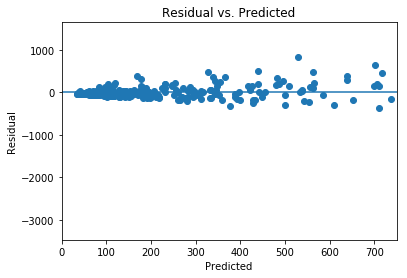

In [14]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.xlim(0,750)
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()